# Lokad_Purchase Orders

### Reading of CSV file

In [1]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

purchase_data = pd.read_csv('Lokad_PurchaseOrders.csv')
#purchase_data

### Code to verify the Data types for purchase_data

In [2]:
purchase_data.dtypes

Id               object
Loc              object
Ref               int64
DeliveryDate     object
Quantity          int64
Received          int64
NetAmount       float64
Supplier         object
PONumber         object
Date             object
Currency         object
dtype: object

## Supply Delay

In [3]:
purchase_data['Date'] = pd.to_datetime(purchase_data['Date'])
purchase_data['DeliveryDate'] = pd.to_datetime(purchase_data['DeliveryDate'])

purchase_data.dtypes

Id                      object
Loc                     object
Ref                      int64
DeliveryDate    datetime64[ns]
Quantity                 int64
Received                 int64
NetAmount              float64
Supplier                object
PONumber                object
Date            datetime64[ns]
Currency                object
dtype: object

### Lead_Time = SupplyDelay + Constant(Reorder delay)
### Reorder delay is kept constant as it depends on the business agreement with the supplier. For our case right now taken reorder as zero

In [4]:
## supply_delay: is the delay in the delivery of the consignment(calculated in days)
## For the supply delay calculation we are going to calculate the difference between the Date column of Lokad_PurchaseOrders and 
## DeliveryDate of the same 
## Date: defines the date when the order was place
## DeliveryDate: defines when the order was delivered to the store.

import math

supply_delay = abs(purchase_data['DeliveryDate'] - purchase_data['Date'])

#print("Supply Delay: {}\n", format(purchase_data['supply_delay'].apply(np.int64)))

In [5]:
new_column = pd.DataFrame({"SupplyDelay": supply_delay})
purchase_data = purchase_data.merge(new_column, left_index = True, right_index = True)
#purchase_data = purchase_data.to_csv(SupplyDelay)
purchase_data.to_csv('Lokad_PurchaseOrders.csv')
purchase_data

,Id,Loc,Ref,DeliveryDate,Quantity,Received,NetAmount,Supplier,PONumber,Date,Currency,SupplyDelay
0,15641711/Los Angeles,Los Angeles,15641711,2016-06-22,50,50,164.999998,FHL,PO-200193,2016-04-20,USD,63 days
1,15641711/Los Angeles,Los Angeles,15641711,2016-07-29,47,47,155.099998,FHL,PO-200243,2016-07-26,USD,3 days
2,16075571/Los Angeles,Los Angeles,16075571,2016-06-22,100,100,300.000000,Logipro,PO-200193,2016-04-20,GBP,63 days
3,16075571/Los Angeles,Los Angeles,16075571,2016-07-29,300,300,900.000000,Logipro,PO-200243,2016-07-26,GBP,3 days
4,16075571/Los Angeles,Los Angeles,16075571,2001-01-01,121,0,363.000000,Logipro,PO-200271,2016-08-24,GBP,5714 days
5,14759689/Los Angeles,Los Angeles,14759689,2001-01-01,103,0,336.809998,Drecom,PO-200271,2016-08-24,GBP,5714 days
6,14095459/Los Angeles,Los Angeles,14095459,2001-01-01,100,0,4654.999920,Drecom,PO-200225,2016-08-06,USD,5696 days
7,15586718/Los Angeles,Los Angeles,15586718,2001-01-01,200,0,11400.000000,Drecom,PO-200225,2016-08-06,GBP,5696 days
8,10095232/Los Angeles,Los Angeles,10095232,2015-05-08,150,150,4002.000045,Office First,102196,2015-05-27,EUR,19 days
9,10095232/Los Angeles,Los Angeles,10095232,2016-06-21,100,100,2668.000030,Office First,PO-200069,2015-11-25,EUR,209 days


## Average Supply delay

In [6]:
## The average lead time calculates the av_lead time for the paticular products for all its instances

In [7]:
purchase_data['SupplyDelay'] = (purchase_data['SupplyDelay'] / np.timedelta64(1, 'D')).astype(int)
purchase_data.dtypes


Id                      object
Loc                     object
Ref                      int64
DeliveryDate    datetime64[ns]
Quantity                 int64
Received                 int64
NetAmount              float64
Supplier                object
PONumber                object
Date            datetime64[ns]
Currency                object
SupplyDelay              int32
dtype: object

In [8]:
purchase_data

,Id,Loc,Ref,DeliveryDate,Quantity,Received,NetAmount,Supplier,PONumber,Date,Currency,SupplyDelay
0,15641711/Los Angeles,Los Angeles,15641711,2016-06-22,50,50,164.999998,FHL,PO-200193,2016-04-20,USD,63
1,15641711/Los Angeles,Los Angeles,15641711,2016-07-29,47,47,155.099998,FHL,PO-200243,2016-07-26,USD,3
2,16075571/Los Angeles,Los Angeles,16075571,2016-06-22,100,100,300.000000,Logipro,PO-200193,2016-04-20,GBP,63
3,16075571/Los Angeles,Los Angeles,16075571,2016-07-29,300,300,900.000000,Logipro,PO-200243,2016-07-26,GBP,3
4,16075571/Los Angeles,Los Angeles,16075571,2001-01-01,121,0,363.000000,Logipro,PO-200271,2016-08-24,GBP,5714
5,14759689/Los Angeles,Los Angeles,14759689,2001-01-01,103,0,336.809998,Drecom,PO-200271,2016-08-24,GBP,5714
6,14095459/Los Angeles,Los Angeles,14095459,2001-01-01,100,0,4654.999920,Drecom,PO-200225,2016-08-06,USD,5696
7,15586718/Los Angeles,Los Angeles,15586718,2001-01-01,200,0,11400.000000,Drecom,PO-200225,2016-08-06,GBP,5696
8,10095232/Los Angeles,Los Angeles,10095232,2015-05-08,150,150,4002.000045,Office First,102196,2015-05-27,EUR,19
9,10095232/Los Angeles,Los Angeles,10095232,2016-06-21,100,100,2668.000030,Office First,PO-200069,2015-11-25,EUR,209


In [9]:
avg_supp = purchase_data.groupby('Ref', as_index = True).SupplyDelay.mean().astype(int)

In [26]:
print(avg_supp.astype(int))

Ref
9952426       58
10014552    1421
10095232     144
10099950    2213
10132892     669
10136626     885
10210677    1049
10255812     886
10422793      85
10592438     783
10595489     670
10678449    1988
10764226      69
11045096    2335
11097836     946
11481389    1200
11557472     150
11635178      58
11711100    1981
11711636    1133
11780124    2444
11788268    1049
11800905      92
11906239    1049
11914966     629
11929369    2115
11941800    1133
12401265     160
12409642    1968
12451991    1159
            ... 
14789055     979
14820865      92
14895172     114
14901389      32
15034737    1325
15063964     895
15092233     992
15149291     869
15343952    1915
15410849    1746
15416092    2103
15431986    1657
15519926    1493
15586718    2904
15641711    2277
15808622     702
15880950    1402
15963625    2448
16018733    1197
16075571     886
16089695     783
16187687    2163
16188573    1224
16239251    1543
16277400    1159
16363786    1452
16401974     933
16412231  

In [19]:
## Forecating the Leadtime for the product

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X = purchase_data[['Date', 'DeliveryDate']]
y = purchase_data['SupplyDelay']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, train_size = 500)

dt = DecisionTreeClassifier().fit(X_train, y_train)

## dt.score(X_test, y_test)

<IPython.core.display.Javascript object>


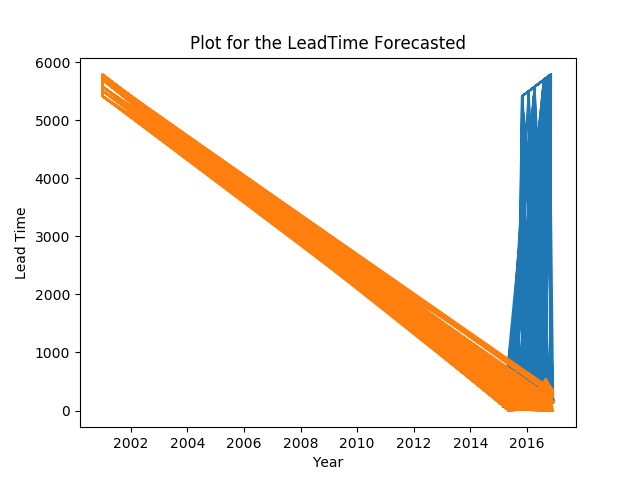

In [25]:
plt.plot(X_test, y_test)
plt.title("Plot for the LeadTime Forecasted")
plt.xlabel('Year')
plt.ylabel('Lead Time')
plt.show()